In [1]:
import numpy as np
from random import randint
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial import Delaunay
from scipy.spatial.distance import cdist

# Parámetros de cada instancia

##### Importante: Las instancias se enumeran del 0 al 14, no del 1 al 15

In [2]:
Mmin = [4, 5, 9, 13, 16, 25, 31, 36, 41, 46, 51, 61, 71, 81, 91]
Mmax = [7, 8, 12, 15, 20, 30, 35, 40, 45, 50, 60, 70, 80, 90, 100]
Nmin = [5, 10, 20, 30, 40, 50, 65, 80, 95, 110, 125, 145, 165, 185, 205]
Nmax = [10, 20, 30, 40, 50, 65, 80, 95, 110, 125, 145, 165, 185, 205, 225]
instancias = pd.DataFrame(data=None, index=range(0,15), columns=["Mmin", "Mmax", "Nmin", "Nmax", "M", "N"])
instancias.index.name = "Instancia"
instancias["Mmin"] = Mmin
instancias["Mmax"] = Mmax
instancias["Nmin"] = Nmin
instancias["Nmax"] = Nmax
for idx in instancias.index:
    Mmin = instancias.loc[idx, "Mmin"]
    Mmax = instancias.loc[idx, "Mmax"]
    Nmin = instancias.loc[idx, "Nmin"]
    Nmax = instancias.loc[idx, "Nmax"]
    instancias.loc[idx, "M"] = randint(Mmin, Mmax)
    instancias.loc[idx, "N"] = randint(Nmin, Nmax)
instancias

,Mmin,Mmax,Nmin,Nmax,M,N
Instancia,,,,,,
0,4,7,5,10,7,6
1,5,8,10,20,5,17
2,9,12,20,30,12,26
3,13,15,30,40,13,35
4,16,20,40,50,16,46
5,25,30,50,65,30,61
6,31,35,65,80,33,79
7,36,40,80,95,37,90
8,41,45,95,110,42,109


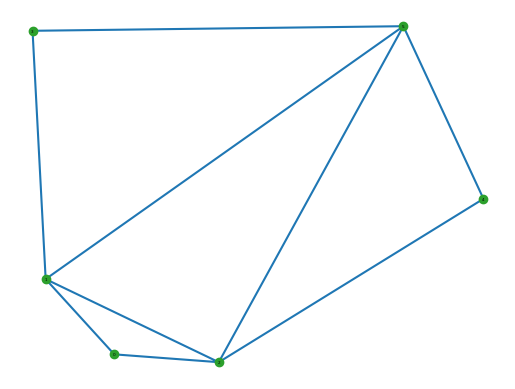

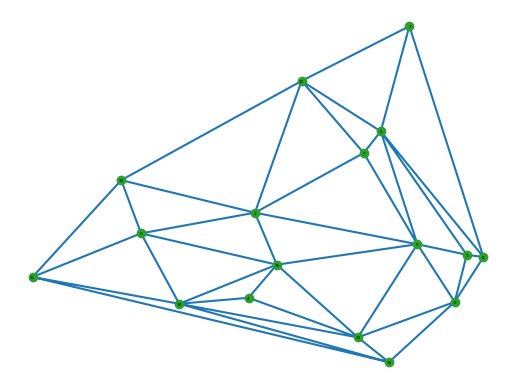

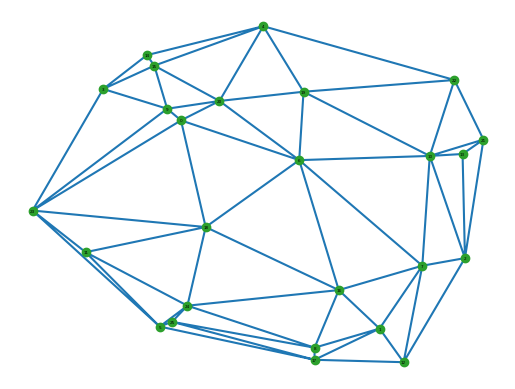

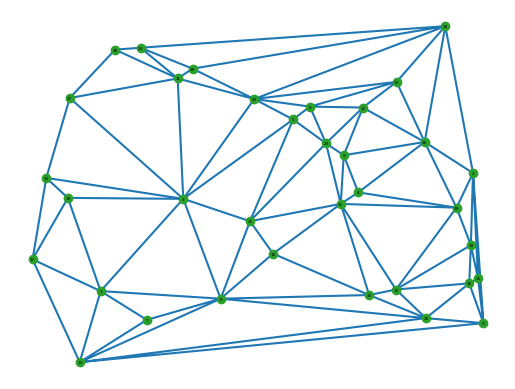

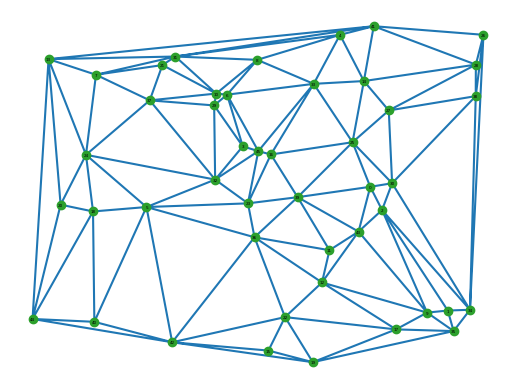

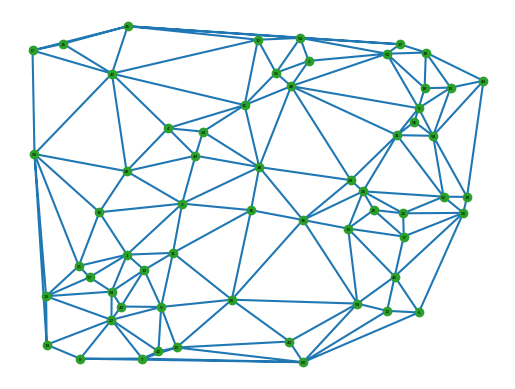

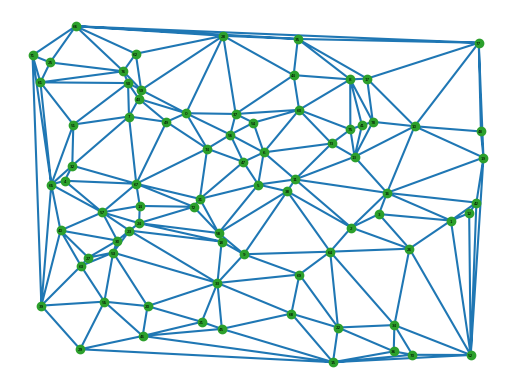

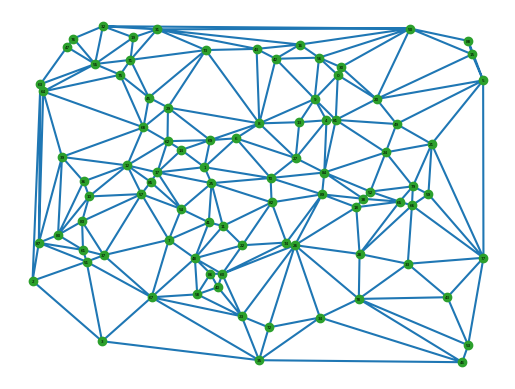

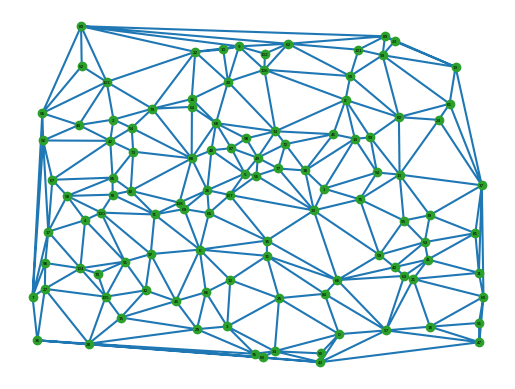

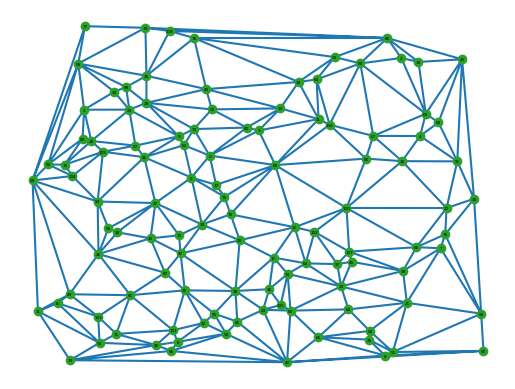

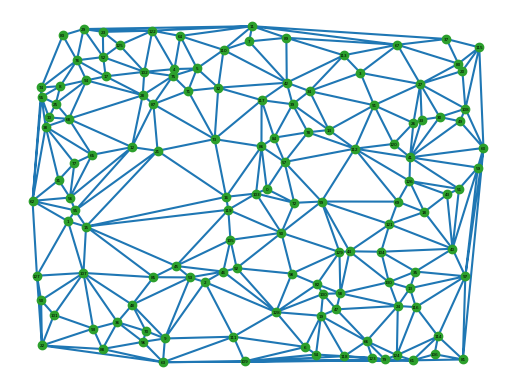

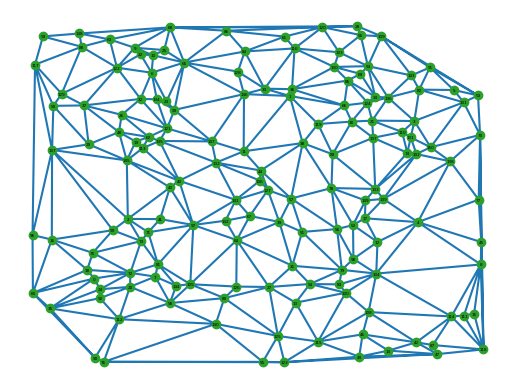

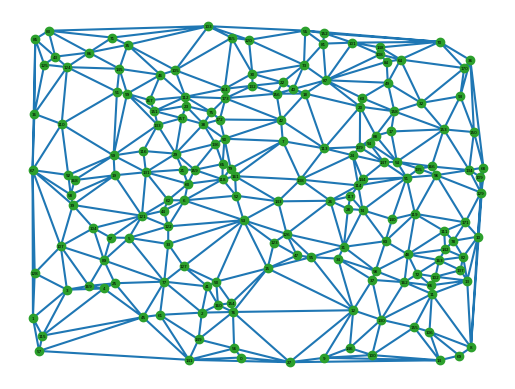

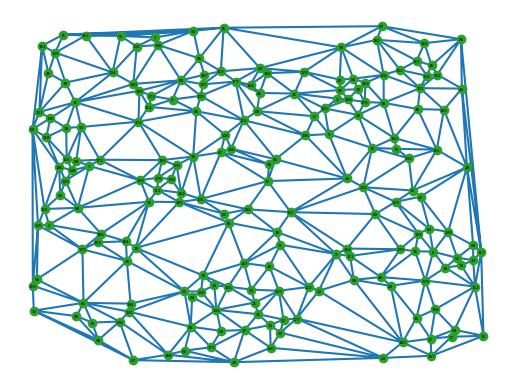

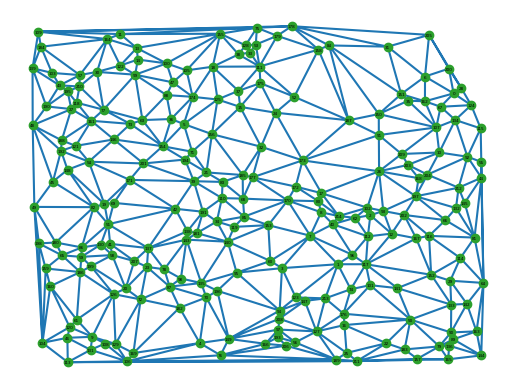

In [6]:
matrices_adyacencia = []
for idx in instancias.index:
    cantidad_nodos = instancias.loc[idx, "N"]
    nodos = np.random.rand(cantidad_nodos, 2)
    distancias = cdist(nodos, nodos)
    np.fill_diagonal(distancias, 1)
    distancia_minima = 0.02
    while distancias.min() < distancia_minima:
        nodo_min = np.where(distancias == distancias.min())[0][0]
        nodos[nodo_min] = np.random.rand(1, 2)
        distancias = cdist(nodos, nodos)
        np.fill_diagonal(distancias, 1)
    triangulacion = Delaunay(nodos)
    aristas = triangulacion.simplices
    nombres_nodos = [str(i) for i in range(len(nodos))]

    matriz_adyacencia = pd.DataFrame(data=None, index=nombres_nodos, columns=nombres_nodos)
    matriz_adyacencia.index.name = "Nodos"
    matriz_adyacencia.columns.name = "Nodos"
    for arista in aristas:
        nodo_a, nodo_b, nodo_c = arista
        matriz_adyacencia.loc[str(nodo_a), str(nodo_b)] = 1
        matriz_adyacencia.loc[str(nodo_b), str(nodo_a)] = 1
        matriz_adyacencia.loc[str(nodo_a), str(nodo_c)] = 1
        matriz_adyacencia.loc[str(nodo_c), str(nodo_a)] = 1
        matriz_adyacencia.loc[str(nodo_b), str(nodo_c)] = 1
        matriz_adyacencia.loc[str(nodo_c), str(nodo_b)] = 1
    matrices_adyacencia.append(matriz_adyacencia)


    # matriz_adyacencia = pd.DataFrame(data=None, index=)
    # matriz_adyacencia.index.name = "Instancia_{}".format(idx)
    plt.triplot(nodos[:, 0], nodos[:, 1], aristas)
    plt.plot(nodos[:, 0], nodos[:, 1], "o")
    for i, nodo in enumerate(nodos):
        plt.annotate(nombres_nodos[i], nodo, textcoords="offset points", xytext=(0, -1), ha="center", fontsize=3, color="black")
    plt.xticks([])
    plt.yticks([])
    plt.axis("off")
    nombre_archivo = "Imagenes/Instancia_{}.png".format(idx)
    plt.savefig(nombre_archivo, dpi=300, bbox_inches='tight')
    plt.show()

In [10]:
matrices_adyacencia[0]

Nodos,0,1,2,3,4,5
Nodos,,,,,,
0,NaN,1,1,NaN,NaN,NaN
1,1,NaN,1,1,NaN,1
2,1,1,NaN,NaN,1,1
3,NaN,1,NaN,NaN,NaN,1
4,NaN,NaN,1,NaN,NaN,1
5,NaN,1,1,1,1,NaN
